In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)

# 👇 Just to confirm you are in the right folder
print("Current working directory:", os.getcwd())
print("Files available here:", os.listdir())

# ✅ Read dataset directly (since it's in the same folder)
data = pd.read_csv("Mall_Customers.csv")

print("\n✅ Dataset loaded successfully! Preview:")
display(data.head())


Current working directory: C:\Users\RIYA\Desktop\ML-Experiments\ExperimentNo9
Files available here: ['.ipynb_checkpoints', 'Mall_Customers.csv', 'Untitled.ipynb']

✅ Dataset loaded successfully! Preview:


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')


In [11]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [13]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [14]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [15]:
dataset.drop_duplicates(inplace=True)

In [16]:
X = dataset.iloc[:, [2, 3]].values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

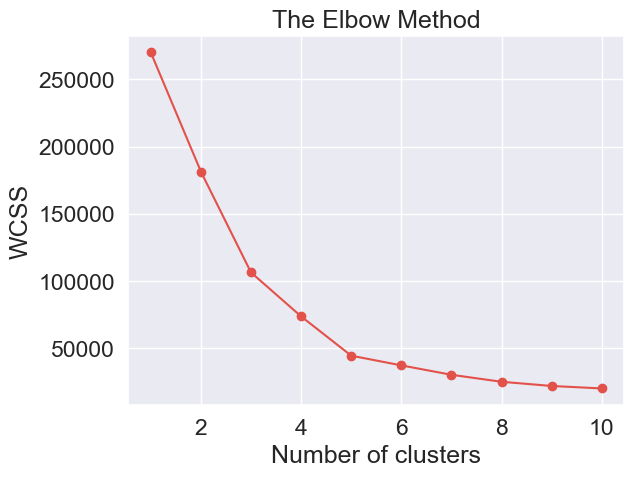

In [18]:
from sklearn.cluster import KMeans

wcss = []  # list to store Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,          # ✅ explicitly set number of initializations
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # ✅ inertia_ gives WCSS

# Optional: plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [20]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


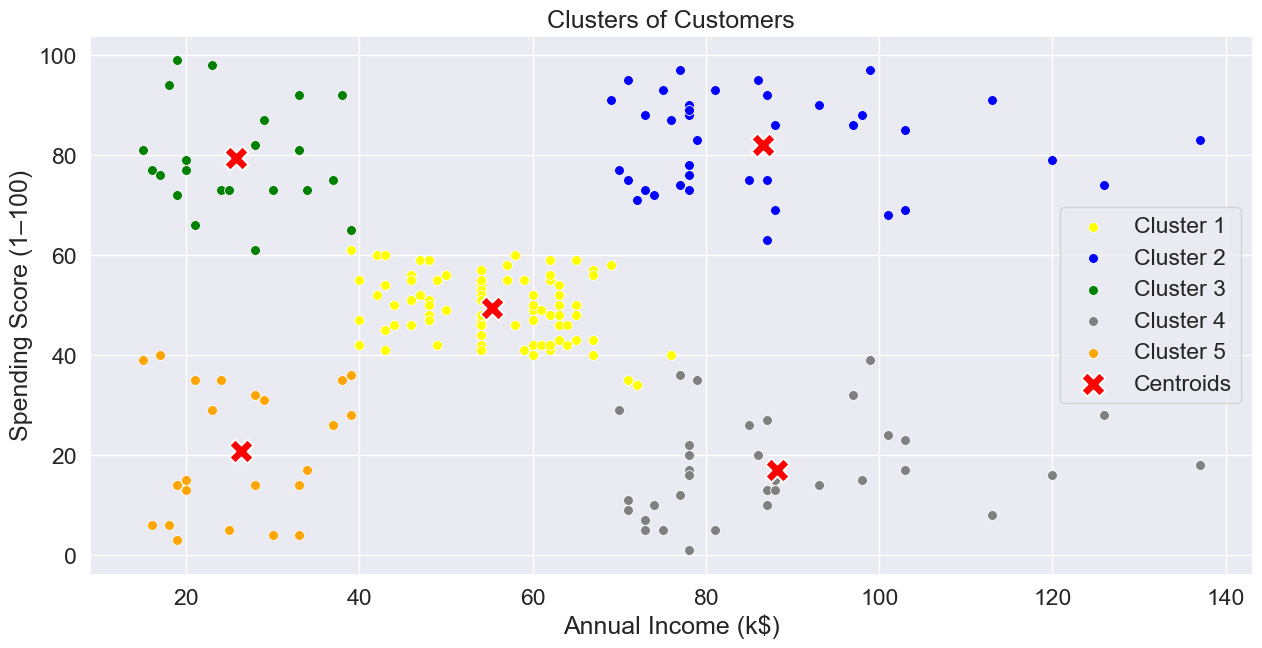

In [22]:
# Visualising the clusters
plt.figure(figsize=(15,7))

# ✅ use keyword arguments x= and y=
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)

# ✅ plot centroids
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    color='red',
    label='Centroids',
    s=300,
    marker='X'
)

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()
